# Maps report
## Upper Olivares catchment - january, 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/Olivares

#### import packages

In [3]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio as rio
import geopandas as gpd
from matplotlib.offsetbox import AnchoredText
import numpy as np
import glob
from matplotlib_scalebar.scalebar import ScaleBar
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

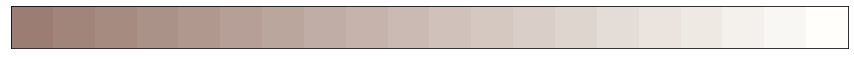

In [9]:
def rgb_hex(rgb):
    return '%02x%02x%02x' % rgb

def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

a = rgb_hex((197,165,113))
b = rgb_hex((167,178,91))
c = rgb_hex((118,166,82))
d = rgb_hex((64,148,85))
e = rgb_hex((52,133,118))
f = rgb_hex((29,81,123))
#g = rgb_hex((6,5,116))

custom_ramp = make_Ramp(["#"+str(f),"#"+str(e),"#"+str(d),"#"+str(c),"#"+str(b),"#"+str(a)])


bb = rgb_hex((156,126,116))
aa = rgb_hex((255,254,250))

ramp = make_Ramp(["#"+str(bb),"#"+str(aa)])

C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


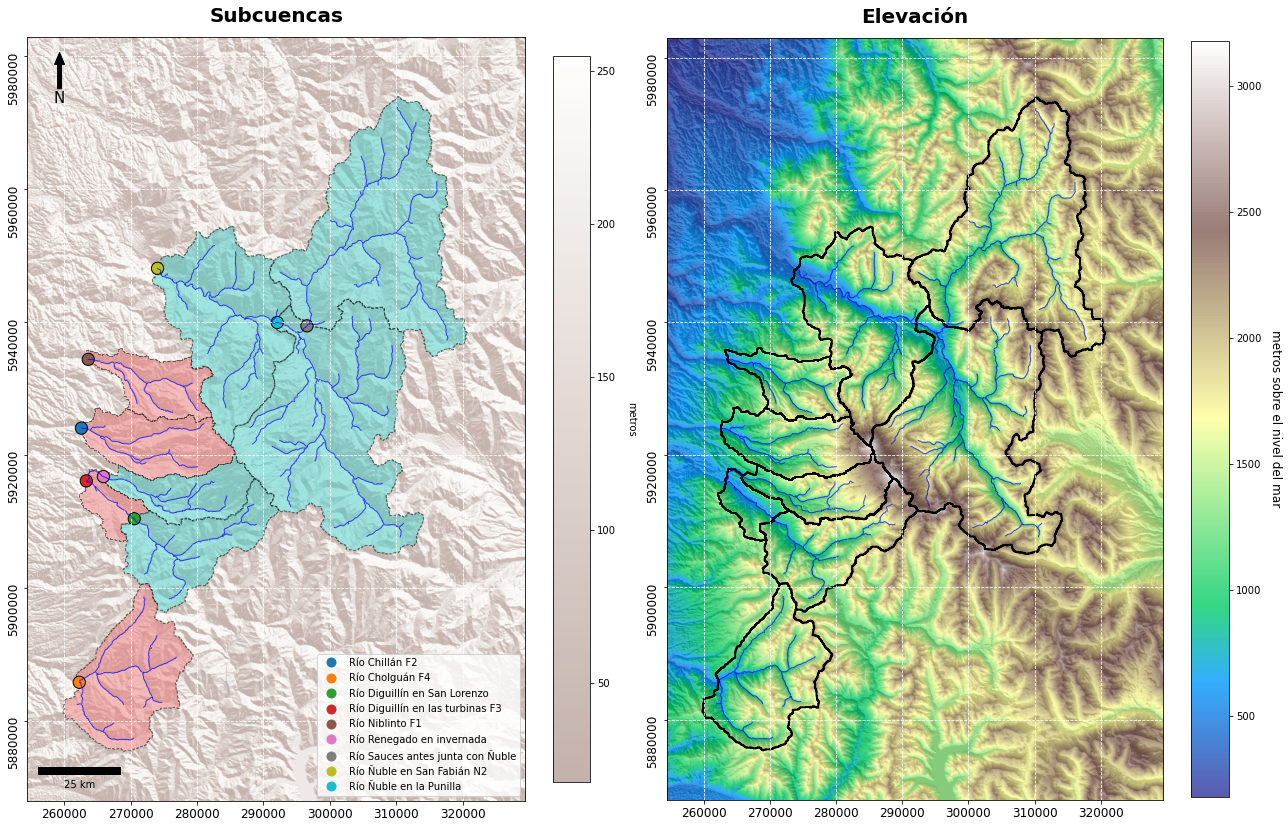

In [13]:
dem_path = r"P:\Projects\Itata\GIS\hbv_ianigla\dem_nivo.tif"
landsat_path = r"P:\Projects\Itata\GIS\landsat5_20010206.tif"
subbasin_path = r"P:\Projects\Itata\GIS\hbv_ianigla\subcuencas.shp"
red_path = r"P:\Projects\Itata\GIS\hbv_ianigla\red_hidrica_subc.shp"
stations_path = r"P:\Projects\Itata\GIS\hbv_ianigla\estaciones_dga_nivo.shp"

dem_r = rio.open(dem_path)
dem = dem_r.read(1)
landsat = rio.open(landsat_path).read(1)
subbasin = gpd.read_file(subbasin_path)
red = gpd.read_file(red_path)
stations = gpd.read_file(stations_path)

dem[dem == 0] = np.nan


#Generate hillshade
hillshade = es.hillshade(dem)


########################### INICIO

#Define subplots dimensions
fig = plt.figure(figsize=(18,18))

#Specific settings
ax0 = fig.add_subplot(122)
ax0.set_facecolor("lightgray")
ext0 = dem_r.bounds
plt.imshow(hillshade,extent=[ext0[0],ext0[2],ext0[1],ext0[3]],cmap="Greys",alpha=1)
plt.imshow(dem,extent=[ext0[0],ext0[2],ext0[1],ext0[3]],cmap="terrain",alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(rotation=90,fontsize=12)
plt.ticklabel_format(useOffset=False,style="plain")
plt.title("Elevación",fontsize=20,pad=15,weight="bold")
plt.grid(ls = "--",color="white")
im_ratio = dem.shape[1]/dem.shape[0]
plt.colorbar(fraction=0.103*im_ratio).set_label("metros sobre el nivel del mar",rotation=270,labelpad=20,fontsize=12)
plt.tight_layout()


#ax0.add_artist(ScaleBar(1,frameon=False,location='lower right',pad=1,box_alpha=0.8))

#x, y, arrow_length = 0.065, 0.98, 0.06
#ax0.annotate("N", xy=(x, y), xytext=(x, y-arrow_length),
#            arrowprops=dict(facecolor="black", width=4, headwidth=10),
#            ha="center", va="center", fontsize=15,
#            xycoords=ax0.transAxes)

subbasin.plot(ax=ax0,facecolor="None",edgecolor="black",linewidth=2,column="Nombre",alpha=1)
red.plot(ax=ax0,edgecolor="Blue",linewidth=1,alpha=0.7)
#stations.plot(ax=ax0,edgecolor="Blue",linewidth=1,column="Name",alpha=1,legend=True)

## 2

ax1 = fig.add_subplot(121)
#ax1.set_facecolor("lightgray")
ext0 = dem_r.bounds

plt.imshow(hillshade,extent=[ext0[0],ext0[2],ext0[1],ext0[3]],alpha=0.6,cmap=ramp)
plt.xticks(fontsize=12)
plt.yticks(rotation=90,fontsize=12)
plt.ticklabel_format(useOffset=False,style="plain")
plt.title("Subcuencas",fontsize=20,pad=15,weight="bold")
plt.grid(ls = "--",color="white")
im_ratio = dem.shape[1]/dem.shape[0]
plt.colorbar(fraction=0.099*im_ratio).set_label("metros",rotation=270,labelpad=20,fontsize=10)
plt.tight_layout()

ax1.add_artist(ScaleBar(2,frameon=False,location='lower left',pad=1,box_alpha=0.5))

x, y, arrow_length = 0.065, 0.98, 0.06
ax1.annotate("N", xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor="black", width=4, headwidth=10),
            ha="center", va="center", fontsize=15,
            xycoords=ax1.transAxes)

colors = ["mediumturquoise","mediumturquoise","mediumturquoise","lightcoral","lightcoral","mediumturquoise","lightcoral","mediumturquoise","lightcoral"]

subbasin.plot(ax=ax1,color=colors,edgecolor="black",linewidth=1,column="Nombre",alpha=0.5,ls="--")
red.plot(ax=ax1,edgecolor="Blue",linewidth=1,alpha=0.7)
stations.plot(ax=ax1,markersize=150,edgecolor="black",linewidth=1,column="Name",alpha=1,legend=True,legend_kwds={"loc": "lower right"})

plt.show()
fig.set_facecolor("white")
fig.savefig(r"P:\Projects\Itata\area_estudio2.png")

C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


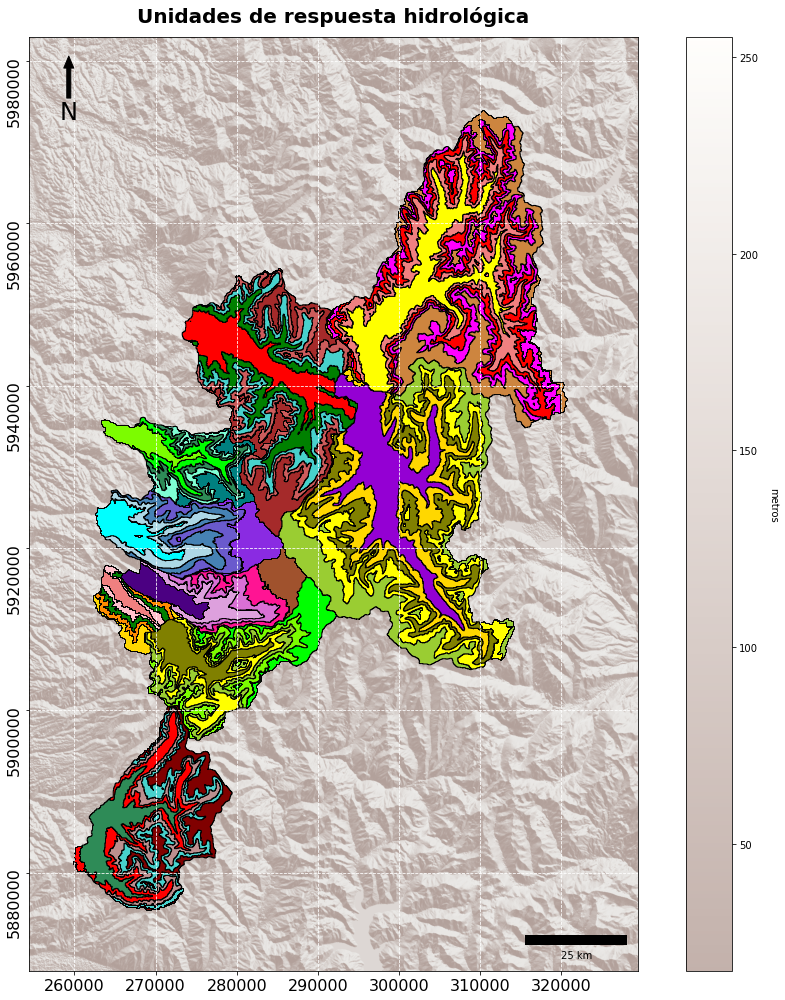

In [14]:
dem_path = r"P:\Projects\Itata\GIS\hbv_ianigla\dem_nivo.tif"
landsat_path = r"P:\Projects\Itata\GIS\landsat5_20010206.tif"
subbasin_path = r"P:\Projects\Itata\GIS\hbv_ianigla\HRU_HBV_5.shp"
red_path = r"P:\Projects\Itata\GIS\hbv_ianigla\red_hidrica_subc.shp"
stations_path = r"P:\Projects\Itata\GIS\hbv_ianigla\estaciones_dga_nivo.shp"

dem_r = rio.open(dem_path)
dem = dem_r.read(1)
landsat = rio.open(landsat_path).read(1)
subbasin = gpd.read_file(subbasin_path)
red = gpd.read_file(red_path)
stations = gpd.read_file(stations_path)

dem[dem == 0] = np.nan

########################### INICIO

#Define subplots dimensions
fig = plt.figure(figsize=(14,14))


ax1 = fig.add_subplot(111)
ax1.set_facecolor("lightgray")
ext0 = dem_r.bounds
plt.imshow(hillshade,extent=[ext0[0],ext0[2],ext0[1],ext0[3]],cmap=ramp,alpha=0.6)
plt.xticks(fontsize=16)
plt.yticks(rotation=90,fontsize=16)
plt.ticklabel_format(useOffset=False,style="plain")
plt.title("Unidades de respuesta hidrológica",fontsize=20,pad=15,weight="bold")
plt.grid(ls = "--",color="white")
im_ratio = dem.shape[1]/dem.shape[0]
plt.colorbar(fraction=0.099*im_ratio).set_label("metros",rotation=270,labelpad=20,fontsize=10)
plt.tight_layout()

ax1.add_artist(ScaleBar(2,frameon=False,location='lower right',pad=1,box_alpha=0.5))

x, y, arrow_length = 0.065, 0.98, 0.06
ax1.annotate("N", xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor="black", width=4, headwidth=10),
            ha="center", va="center", fontsize=24,
            xycoords=ax1.transAxes)

colors = ["red","green","mediumturquoise","indianred","brown",
          "yellow","lightcoral","red","fuchsia","peru",
          "darkviolet","gold","olive","yellow","yellowgreen","lawngreen",
          "lime","seagreen","aquamarine","teal","aqua",
          "lightblue","steelblue","slateblue","blueviolet","indigo",
          "plum","orchid","deeppink",
          "sienna","lightcoral","pink","green","darkorange",
          "gold","olive","yellow","yellowgreen","lawngreen",
          "lime","seagreen","red","rosybrown","mediumturquoise","maroon"]

subbasin.plot(ax=ax1,color=colors,edgecolor="black",linewidth=1,column="ID",alpha=1)
#red.plot(ax=ax1,edgecolor="Blue",linewidth=1,alpha=0.7)
#stations.plot(ax=ax1,markersize=150,edgecolor="black",linewidth=1,column="Name",alpha=1,legend=True,legend_kwds={"loc": "lower right"})

plt.show()
fig.set_facecolor("white")
fig.savefig(r"P:\Projects\Itata\HRU.png",dpi=600)

UsageError: Line magic function `%matplotlib.colors` not found.
